In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

In [97]:
# Function to create a sphere
def create_sphere(ax, radius=1, color='lightblue', alpha=0.2):
    # Create a sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = radius * np.outer(np.cos(u), np.sin(v))
    y = radius * np.outer(np.sin(u), np.sin(v))
    z = radius * np.outer(np.ones(np.size(u)), np.cos(v))

    # Plot the surface
    ax.plot_surface(x, y, z, color=color, alpha=alpha)

In [98]:
# Function to add planes at the axes
def add_planes(ax, radius=1):
    # Planes on axes
    u = np.linspace(-radius, radius, 100)
    v = np.linspace(-radius, radius, 100)
    u, v = np.meshgrid(u, v)
    zeros = np.zeros_like(u)

    # XY, YZ, ZX planes
    ax.plot_surface(u, v, zeros, alpha=0.1)
    ax.plot_surface(zeros, u, v, alpha=0.1)
    ax.plot_surface(v, zeros, u, alpha=0.1)
    
    # Setting labels for each axis
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

In [108]:
# Function to determine if a point is in front of the sphere & set color according to gradient
def point_color(x, y, z):
    c = ((x + 1) / 2 + (-y + 1) / 2 + (z + 1) / 2)/3
    return c/2+0.5

In [100]:
def point_alpha(x, y, z):
    # Normalize each coordinate to a range of [0, 1] and sum them
    # Assuming x, y, z are within [-1, 1] as in the case of a unit sphere
    normalized_sum = (x + 1) / 2 + (-y + 1) / 2 + (z + 1) / 2
    # Divide by 3 to get the average, ensuring alpha is within [0, 1]
    return normalized_sum / 3

In [118]:
# Function to draw a circle on the sphere's surface
def draw_circle_on_sphere(ax, center, radius, color, alpha, num_points=100):
    # Generating points for the circle
    theta = np.linspace(0, 2*np.pi, num_points)
    circle_x = center[0] + radius * np.cos(theta)
    circle_y = center[1] + radius * np.sin(theta)
    circle_z = center[2] * np.ones(num_points)  # Keeping the z-coordinate constant

    # Projecting the circle onto the sphere's surface
    norm = np.sqrt(circle_x**2 + circle_y**2 + circle_z**2)
    circle_x, circle_y, circle_z = circle_x/norm, circle_y/norm, circle_z/norm

    # Drawing the circle
    ax.plot(circle_x, circle_y, circle_z, color=color, alpha=alpha, linewidth=1)

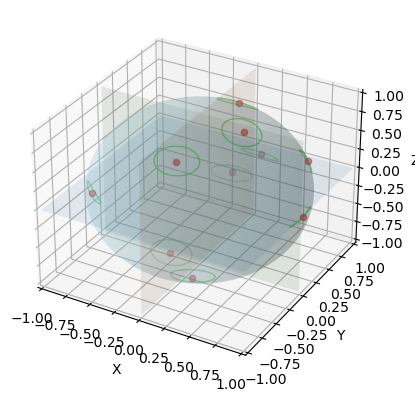

In [175]:
####### STATIC PICTURE

# Initialize the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a sphere
create_sphere(ax)

# Add planes
add_planes(ax)

# Circle properties
circle_radius = 0.2  # Adjust the radius of the circles here

# Static red dots
num_red_dots = 10
for _ in range(num_red_dots):
    phi = np.random.uniform(0, np.pi)
    theta = np.random.uniform(0, 2 * np.pi)
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)
    
    # Draw a circle around the dot
    ac = point_alpha(x,y,z)
    cc = point_color(x,y,z)
    draw_circle_on_sphere(ax, [x, y, z], circle_radius, color=(0.2,cc,0.2), alpha=ac)
    
    # Change color and alpha based on position
    ap = point_alpha(x,y,z)
    cp = point_color(x,y,z)
    ax.scatter(x, y, z, color=(cp,0.2,0.2), alpha=ap)

# Set limits
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

plt.savefig('gamma-neighborhoods.png', bbox_inches='tight')

# Show plot
plt.show()

In [167]:
def update(frame):
    #global circle_radius
    global circle_radius, sphere_handle, plane_handles, circle_handles

    circle_radius += 0.1  # Increment the radius
    
    ### v1
    # Remove stuff
    #for collection in ax.collections[initial_collections_count:]:
    #    collection.remove()
    # Redraw the sphere and planes to maintain their visibility
    #create_sphere(ax)
    #add_planes(ax)
    ### v2
    # Remove the old sphere, planes, and circles
    #if sphere_handle:
    #    if sphere_handle is not None:
    #        sphere_handle.remove()
    #if plane_handles is not None:
    #    for handle in plane_handles:
    #        if handle is not None:
    #            handle.remove()
    #if circle_handles is not None:
    #    for handle in circle_handles:
    #        if handle is not None:
    #            handle.remove()
    #circle_handles.clear()
    # Redraw the sphere and planes
    #sphere_handle = create_sphere(ax)
    #plane_handles = add_planes(ax)
    ### v3
    # Remove the old sphere, planes, and circles
    if sphere_handle:
        sphere_handle.remove()
        sphere_handle = None
    for handle in plane_handles:
        if handle:
            handle.remove()
    plane_handles.clear()
    for handle in circle_handles:
        if handle:
            handle.remove()
    circle_handles.clear()
    # Redraw the sphere and planes
    sphere_handle = create_sphere(ax)
    plane_handles.extend(add_planes(ax))

    # Update the existing green circles with increased radius
    for dot in red_dot_positions:
        ac = point_alpha(*dot)
        cc = point_color(*dot)
        ### v1
        #draw_circle_on_sphere(ax, dot, circle_radius, color=(0.2, cc, 0.2), alpha=ac)
        ### v2
        #circle_handle = draw_circle_on_sphere(ax, dot, circle_radius, color=(0.2, cc, 0.2), alpha=ac)
        #circle_handles.append(circle_handle)
        ### v3
        circle_handle = draw_circle_on_sphere(ax, dot, circle_radius, color=(0.2, cc, 0.2), alpha=ac)
        if circle_handle:
            circle_handles.append(circle_handle)

    # Add a new purple dot
    phi = np.random.uniform(0, np.pi)
    theta = np.random.uniform(0, 2 * np.pi)
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)
    ax.scatter(x, y, z, color='purple', alpha=0.8)

IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x115695080> (for post_execute):


TypeError: 'NoneType' object is not iterable

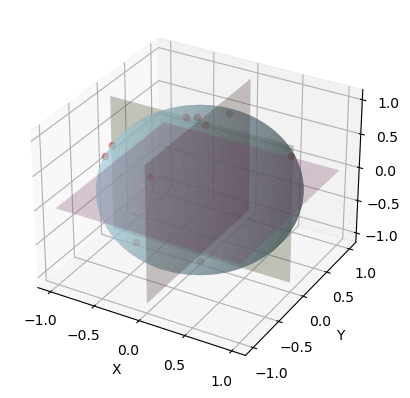

In [168]:
# Initialize global variables to track plot handles
sphere_handle = None
plane_handles = []
circle_handles = []

# Initialize the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a sphere and add planes
create_sphere(ax)
add_planes(ax)

# Save the initial number of collections (for the sphere and planes)
initial_collections_count = len(ax.collections)

# Circle properties
circle_radius = 0.2  # Initial radius of the circles

# Number of red dots (and green circles)
num_red_dots = 10

# Initialize red dots
red_dot_positions = []
for _ in range(num_red_dots):
    phi = np.random.uniform(0, np.pi)
    theta = np.random.uniform(0, 2 * np.pi)
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)
    red_dot_positions.append((x, y, z))
    
    ap = point_alpha(x,y,z)
    cp = point_color(x,y,z)
    ax.scatter(x, y, z, color=(cp,0.2,0.2), alpha=ap)

# Creating the animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 5), interval=1000)

# Save the animation as a GIF
ani.save('sphere_animation.gif', writer='pillow')

# Uncomment to display the plot (not needed for saving GIF)
#plt.show()